In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [4]:
file_path = 'data_banknote_authentication.txt'
column_names = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
data = pd.read_csv(file_path, header=None, names=column_names)
print(data.head())


   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [5]:
print(data.describe())

          variance     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


In [6]:
# displays basic statistical summaries (mean, std, min, max, quartiles) for all numerical columns

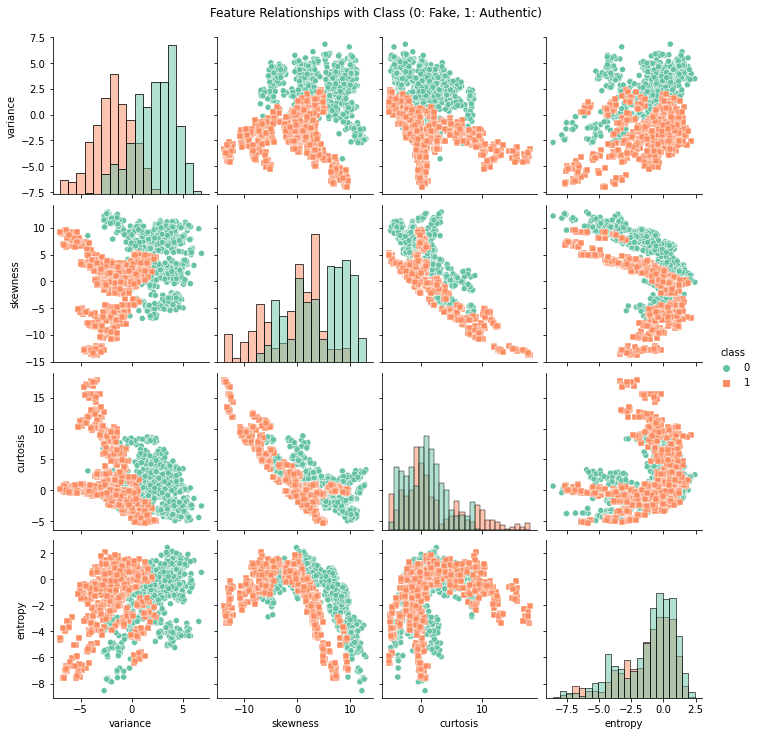

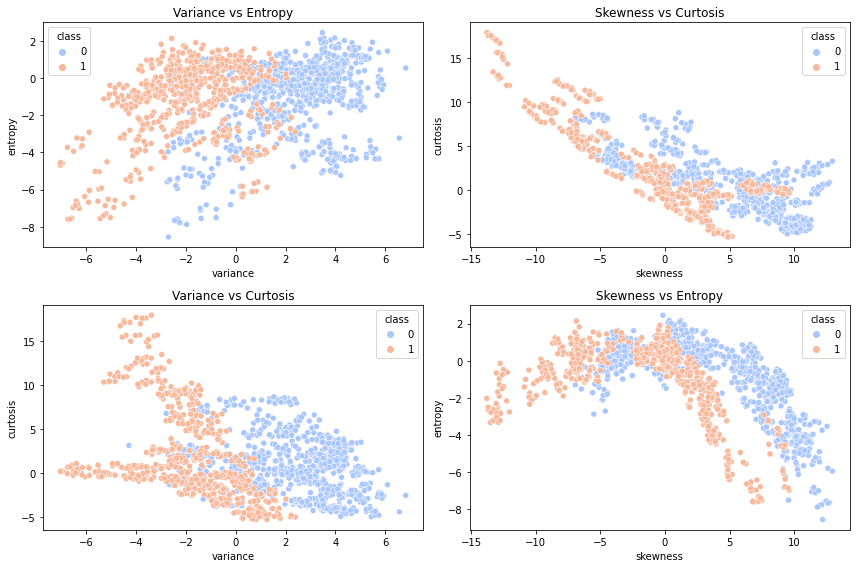

In [7]:
sns.pairplot(data, hue='class', diag_kind='hist', markers=['o', 's'], palette='Set2')
plt.suptitle("Feature Relationships with Class (0: Fake, 1: Authentic)", y=1.02)
plt.show()

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.scatterplot(data=data, x='variance', y='entropy', hue='class', palette='coolwarm')
plt.title('Variance vs Entropy')

plt.subplot(2, 2, 2)
sns.scatterplot(data=data, x='skewness', y='curtosis', hue='class', palette='coolwarm')
plt.title('Skewness vs Curtosis')

plt.subplot(2, 2, 3)
sns.scatterplot(data=data, x='variance', y='curtosis', hue='class', palette='coolwarm')
plt.title('Variance vs Curtosis')

plt.subplot(2, 2, 4)
sns.scatterplot(data=data, x='skewness', y='entropy', hue='class', palette='coolwarm')
plt.title('Skewness vs Entropy')

plt.tight_layout()
plt.show()


In [8]:
# based on the pairplot, the features show clear separation between classes.
# decision trees are suitable here due to their ability to handle non-linear, axis-aligned splits.
# most feature pairs show structured patterns, so a decision tree can likely perform well.


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [11]:
X = data.drop('class', axis=1)
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y)


In [12]:
print("Class distribution in the full dataset:")
print(y.value_counts(normalize=True))

print("\nClass distribution in the training set:")
print(y_train.value_counts(normalize=True))

print("\nClass distribution in the test set:")
print(y_test.value_counts(normalize=True))

Class distribution in the full dataset:
0    0.555394
1    0.444606
Name: class, dtype: float64

Class distribution in the training set:
0    0.55515
1    0.44485
Name: class, dtype: float64

Class distribution in the test set:
0    0.556364
1    0.443636
Name: class, dtype: float64


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       153
           1       0.98      0.93      0.95       122

    accuracy                           0.96       275
   macro avg       0.96      0.96      0.96       275
weighted avg       0.96      0.96      0.96       275



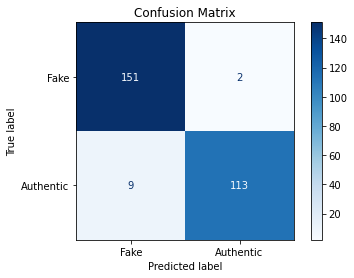

In [13]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=10, random_state=7)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


print("Classification Report:")
print(classification_report(y_test, y_pred))

disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=["Fake", "Authentic"], cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

Alternative Model (Entropy) - Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       153
           1       0.98      0.96      0.97       122

    accuracy                           0.97       275
   macro avg       0.98      0.97      0.97       275
weighted avg       0.97      0.97      0.97       275



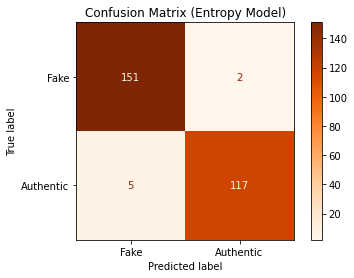

In [14]:
clf_alt = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5, random_state=7)
clf_alt.fit(X_train, y_train)
y_pred_alt = clf_alt.predict(X_test)

print("Alternative Model (Entropy) - Classification Report:")
print(classification_report(y_test, y_pred_alt))

ConfusionMatrixDisplay.from_estimator(clf_alt, X_test, y_test, display_labels=["Fake", "Authentic"], cmap="Oranges")
plt.title("Confusion Matrix (Entropy Model)")
plt.show()

In [15]:
from sklearn.tree import plot_tree

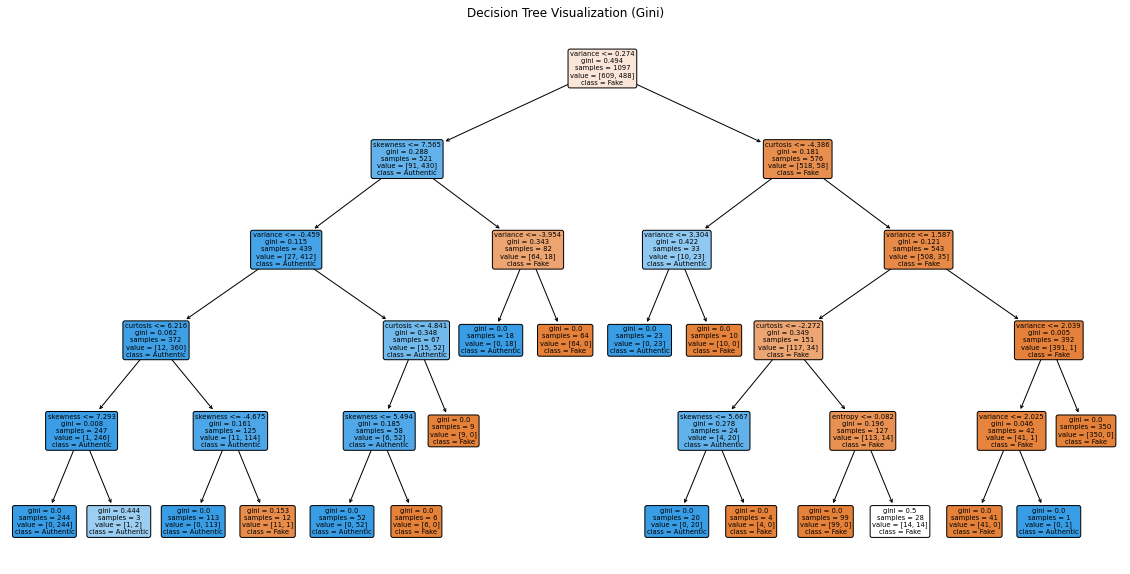

In [16]:
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=["Fake", "Authentic"], filled=True, rounded=True)
plt.title("Decision Tree Visualization (Gini)")
plt.show()


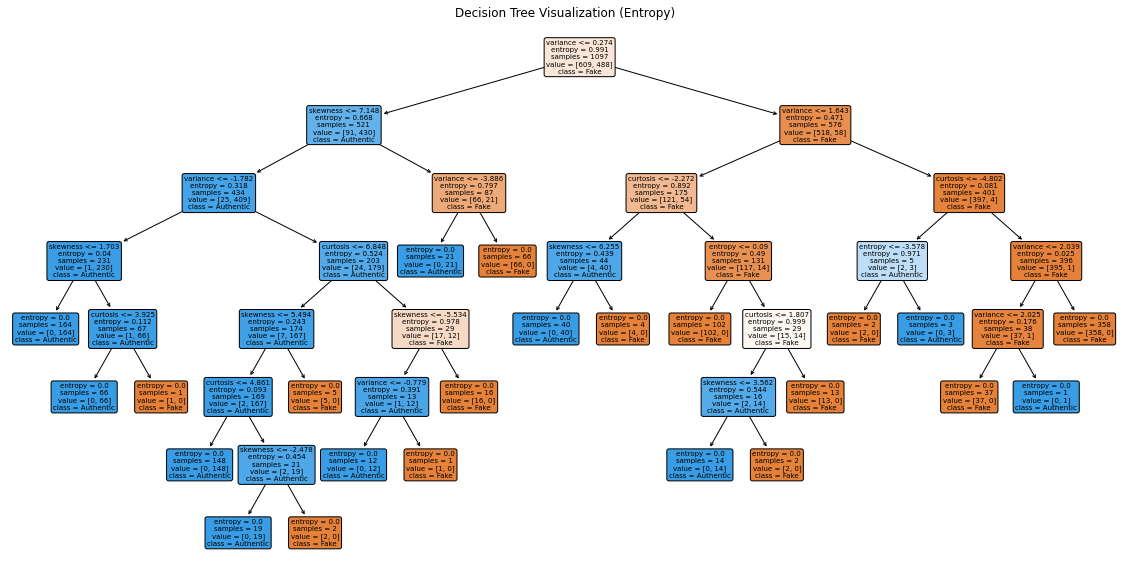

In [17]:
plt.figure(figsize=(20, 10))
plot_tree(clf_alt, feature_names=X.columns, class_names=["Fake", "Authentic"], filled=True, rounded=True)
plt.title("Decision Tree Visualization (Entropy)")
plt.show()

In [19]:
import numpy as np

In [20]:
feature_names = X.columns
importances = clf_alt.feature_importances_  
indices = np.argsort(importances)[::-1]     

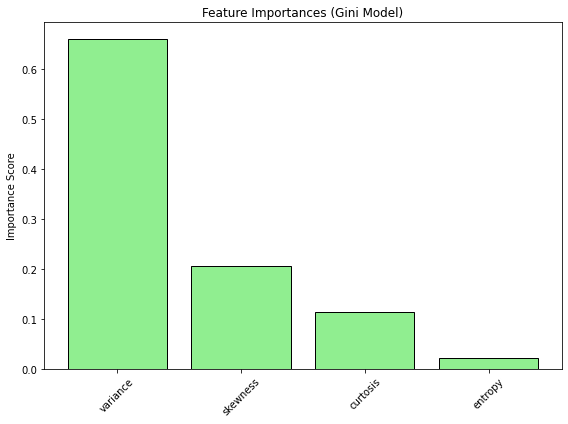

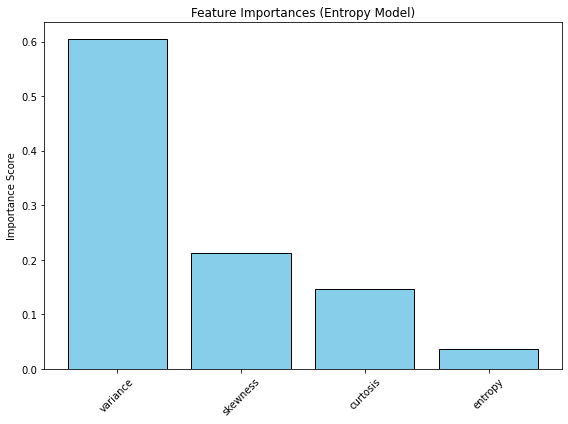

In [22]:
gini_importances = clf.feature_importances_
entropy_importances = clf_alt.feature_importances_
feature_names = X.columns
gini_idx = np.argsort(gini_importances)[::-1]
entropy_idx = np.argsort(entropy_importances)[::-1]

plt.figure(figsize=(8, 6))
plt.title("Feature Importances (Gini Model)")
plt.bar(range(X.shape[1]), gini_importances[gini_idx], color="lightgreen", edgecolor="black")
plt.xticks(range(X.shape[1]), feature_names[gini_idx], rotation=45)
plt.ylabel("Importance Score")
plt.tight_layout()
plt.savefig("feature_importance_gini.png")
plt.show()

plt.figure(figsize=(8, 6))
plt.title("Feature Importances (Entropy Model)")
plt.bar(range(X.shape[1]), entropy_importances[entropy_idx], color="skyblue", edgecolor="black")
plt.xticks(range(X.shape[1]), feature_names[entropy_idx], rotation=45)
plt.ylabel("Importance Score")
plt.tight_layout()
plt.savefig("feature_importance_entropy.png")
plt.show()